## gl-pgp-aiml-uta-intl-may20-AnthonyDjemah

Deliverables:
• Perform basic data pre-processing (if needed), univariate and bivariate analysis. Use relevant visualizations to understand the features at hand. Which features are strongly correlated to the target variable? - 15
• Build a pruned decision tree model and present the evaluation metrics. – 15
• Build all the ensemble models taught as a part of the curriculum and compare the models. - 20
• Present the model comparison in a data frame. - 5
• Comment on the codes and provide detailed explanation of the steps followed. – 5

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

#from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.5f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [25]:
#Load data
PKS_df = pd.read_csv('C:\\Users\\garrettikekhua\\Downloads\\PGD-AIML\\Program Content\\Ensemble Techniques\\Project Ensemble Techniques - Term Deposit Subscription Prediction\\parkinsons.data')

In [26]:
PKS_df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1    119.99200     157.30200      74.99700         0.00784   
1  phon_R01_S01_2    122.40000     148.65000     113.81900         0.00968   
2  phon_R01_S01_3    116.68200     131.11100     111.55500         0.01050   
3  phon_R01_S01_4    116.67600     137.87100     111.36600         0.00997   
4  phon_R01_S01_5    116.01400     141.78100     110.65500         0.01284   
5  phon_R01_S01_6    120.55200     131.16200     113.78700         0.00968   
6  phon_R01_S02_1    120.26700     137.24400     114.82000         0.00333   
7  phon_R01_S02_2    107.33200     113.84000     104.31500         0.00290   
8  phon_R01_S02_3     95.73000     132.06800      91.75400         0.00551   
9  phon_R01_S02_4     95.05600     120.10300      91.22600         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA     NHR      HNR  status    RPDE     DFA  spread1  spread2  \
0      0.06545 0.02211 21.03300       1 0.41478 0.81529 -4.81303  0.26648   
1      0.09403 0.01929 19.08500       1 0.45836 0.81952 -4.07519  0.33559   
2      0.08270 0.01309 20.65100       1 0.42989 0.82529 -4.44318  0.31117   
3      0.08771 0.01353 20.64400       1 0.43497 0.81924 -4.11750  0.33415   
4      0.10470 0.01767 19.64900       1 0.41736 0.82348 -3.74779  0.23451   
5      0.06985 0.01222 21.37800       1 0.41556 0.82507 -4.24287  0.29911   
6      0.02337 0.00607 24.88600       1 0.59604 0.76411 -5.63432  0.25768   
7      0.02487 0.00344 26.89200       1 0.63742 0.76326 -6.16760  0.18372   
8      0.03218 0.01070 21.81200       1 0.61555 0.77359 -5.49868  0.32777   
9      0.04324 0.01022 21.86200       1 0.54704 0.79846 -5.01188  0.32600   

       D2     PPE  
0 2.30144 0.28465  
1 2.48685 0.36867  
2 2.34226 0.33263  
3 2.40555 0.36897  
4 2.33218 0.41034  
5 2.18756 0.35778  
6 1.85478 0.21176  
7 2.06469 0.16375  
8 2.32251 0.23157  
9 2.43279 0.27136  

[10 rows x 24 columns]

In [27]:
PKS_df.shape

(195, 24)

In [28]:
PKS_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Perform basic data pre-processing (if needed), univariate and bivariate analysis. Use relevant visualizations to understand the features at hand. Which features are strongly correlated to the target variable?

In [29]:
#The 'name' Column is not important so, we will drop it

PKS_df_nw1 = PKS_df.drop(['name'], axis=1)

In [30]:
PKS_df_nw1.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    119.99200     157.30200      74.99700         0.00784           0.00007   
1    122.40000     148.65000     113.81900         0.00968           0.00008   
2    116.68200     131.11100     111.55500         0.01050           0.00009   
3    116.67600     137.87100     111.36600         0.00997           0.00009   
4    116.01400     141.78100     110.65500         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374           0.42600  ...   
1   0.00465   0.00696     0.01394       0.06134           0.62600  ...   
2   0.00544   0.00781     0.01633       0.05233           0.48200  ...   
3   0.00502   0.00698     0.01505       0.05492           0.51700  ...   
4   0.00655   0.00908     0.01966       0.06425           0.58400  ...   

   Shimmer:DDA     NHR      HNR  status    RPDE     DFA  spread1  spread2  \
0      0.06545 0.02211 21.03300       1 0.41478 0.81529 -4.81303  0.26648   
1      0.09403 0.01929 19.08500       1 0.45836 0.81952 -4.07519  0.33559   
2      0.08270 0.01309 20.65100       1 0.42989 0.82529 -4.44318  0.31117   
3      0.08771 0.01353 20.64400       1 0.43497 0.81924 -4.11750  0.33415   
4      0.10470 0.01767 19.64900       1 0.41736 0.82348 -3.74779  0.23451   

       D2     PPE  
0 2.30144 0.28465  
1 2.48685 0.36867  
2 2.34226 0.33263  
3 2.40555 0.36897  
4 2.33218 0.41034  

[5 rows x 23 columns]

In [13]:
PKS_df_nw1.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [ ]:
#plot the graphs of different variable to see the distributions.

#import matplotlib.pyplot as plt
#import seaborn as sns

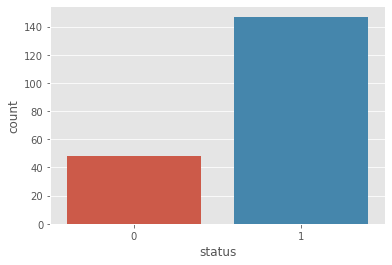

In [31]:
# There are more positive than negatiive cases in the Data

sns.countplot(PKS_df_nw1['status'])

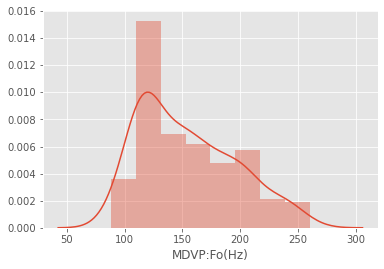

In [32]:
sns.distplot(PKS_df_nw1['MDVP:Fo(Hz)'])

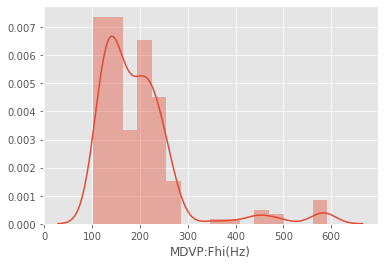

In [33]:
sns.distplot(PKS_df_nw1['MDVP:Fhi(Hz)'])

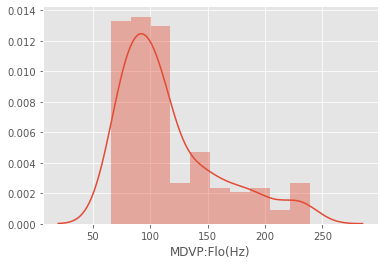

In [34]:
sns.distplot(PKS_df_nw1['MDVP:Flo(Hz)'])

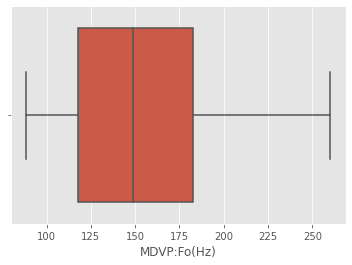

In [37]:
# There are no outliners

sns.boxplot(PKS_df_nw1['MDVP:Fo(Hz)']);

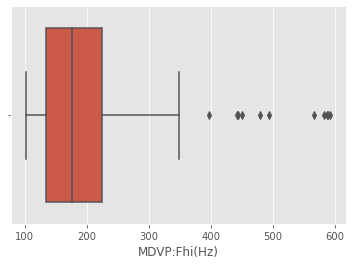

In [38]:
# There are a lot of outliners

sns.boxplot(PKS_df_nw1['MDVP:Fhi(Hz)']);

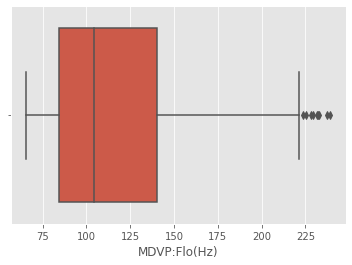

In [39]:
# There are some outliners

sns.boxplot(PKS_df_nw1['MDVP:Flo(Hz)']);

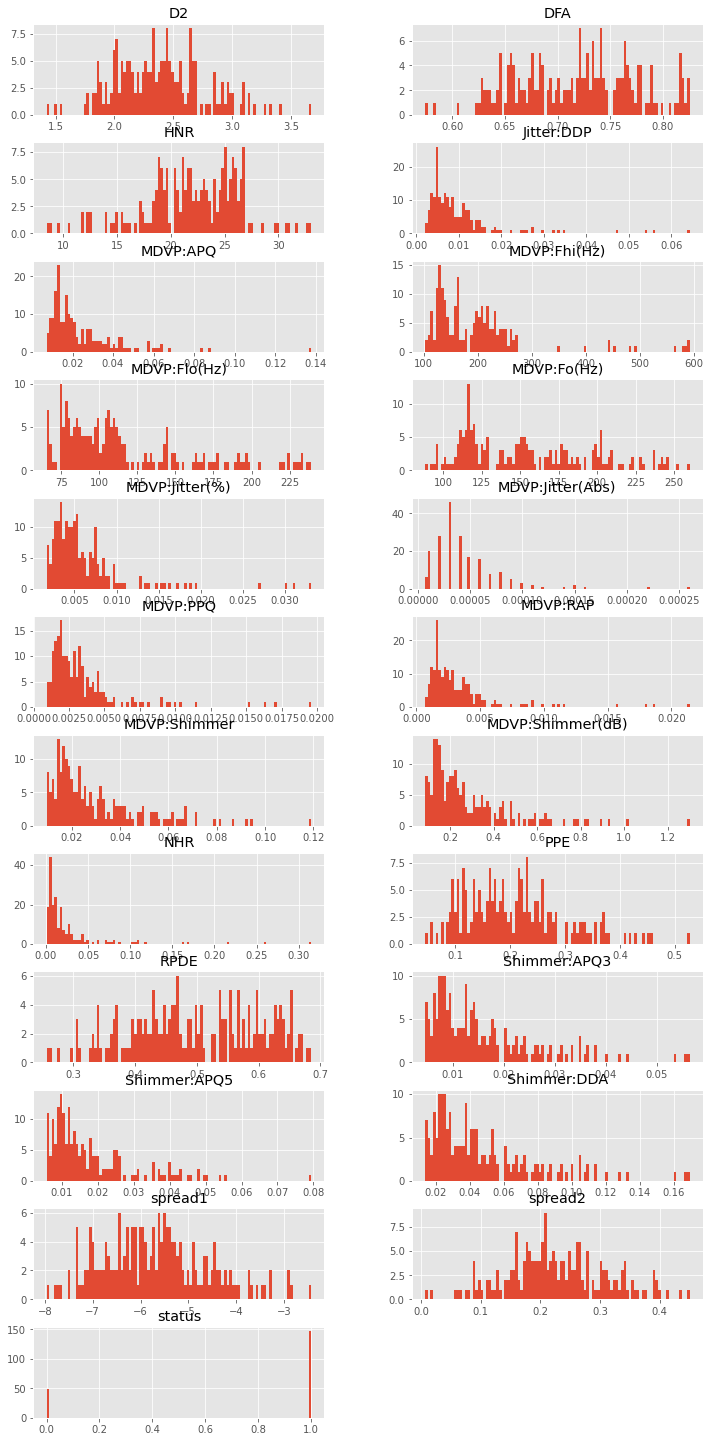

In [40]:
# Histogram of the 24 columns

columns = list(PKS_df_nw1)[0:23] # Excluding Outcome column which has only 
PKS_df_nw1[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

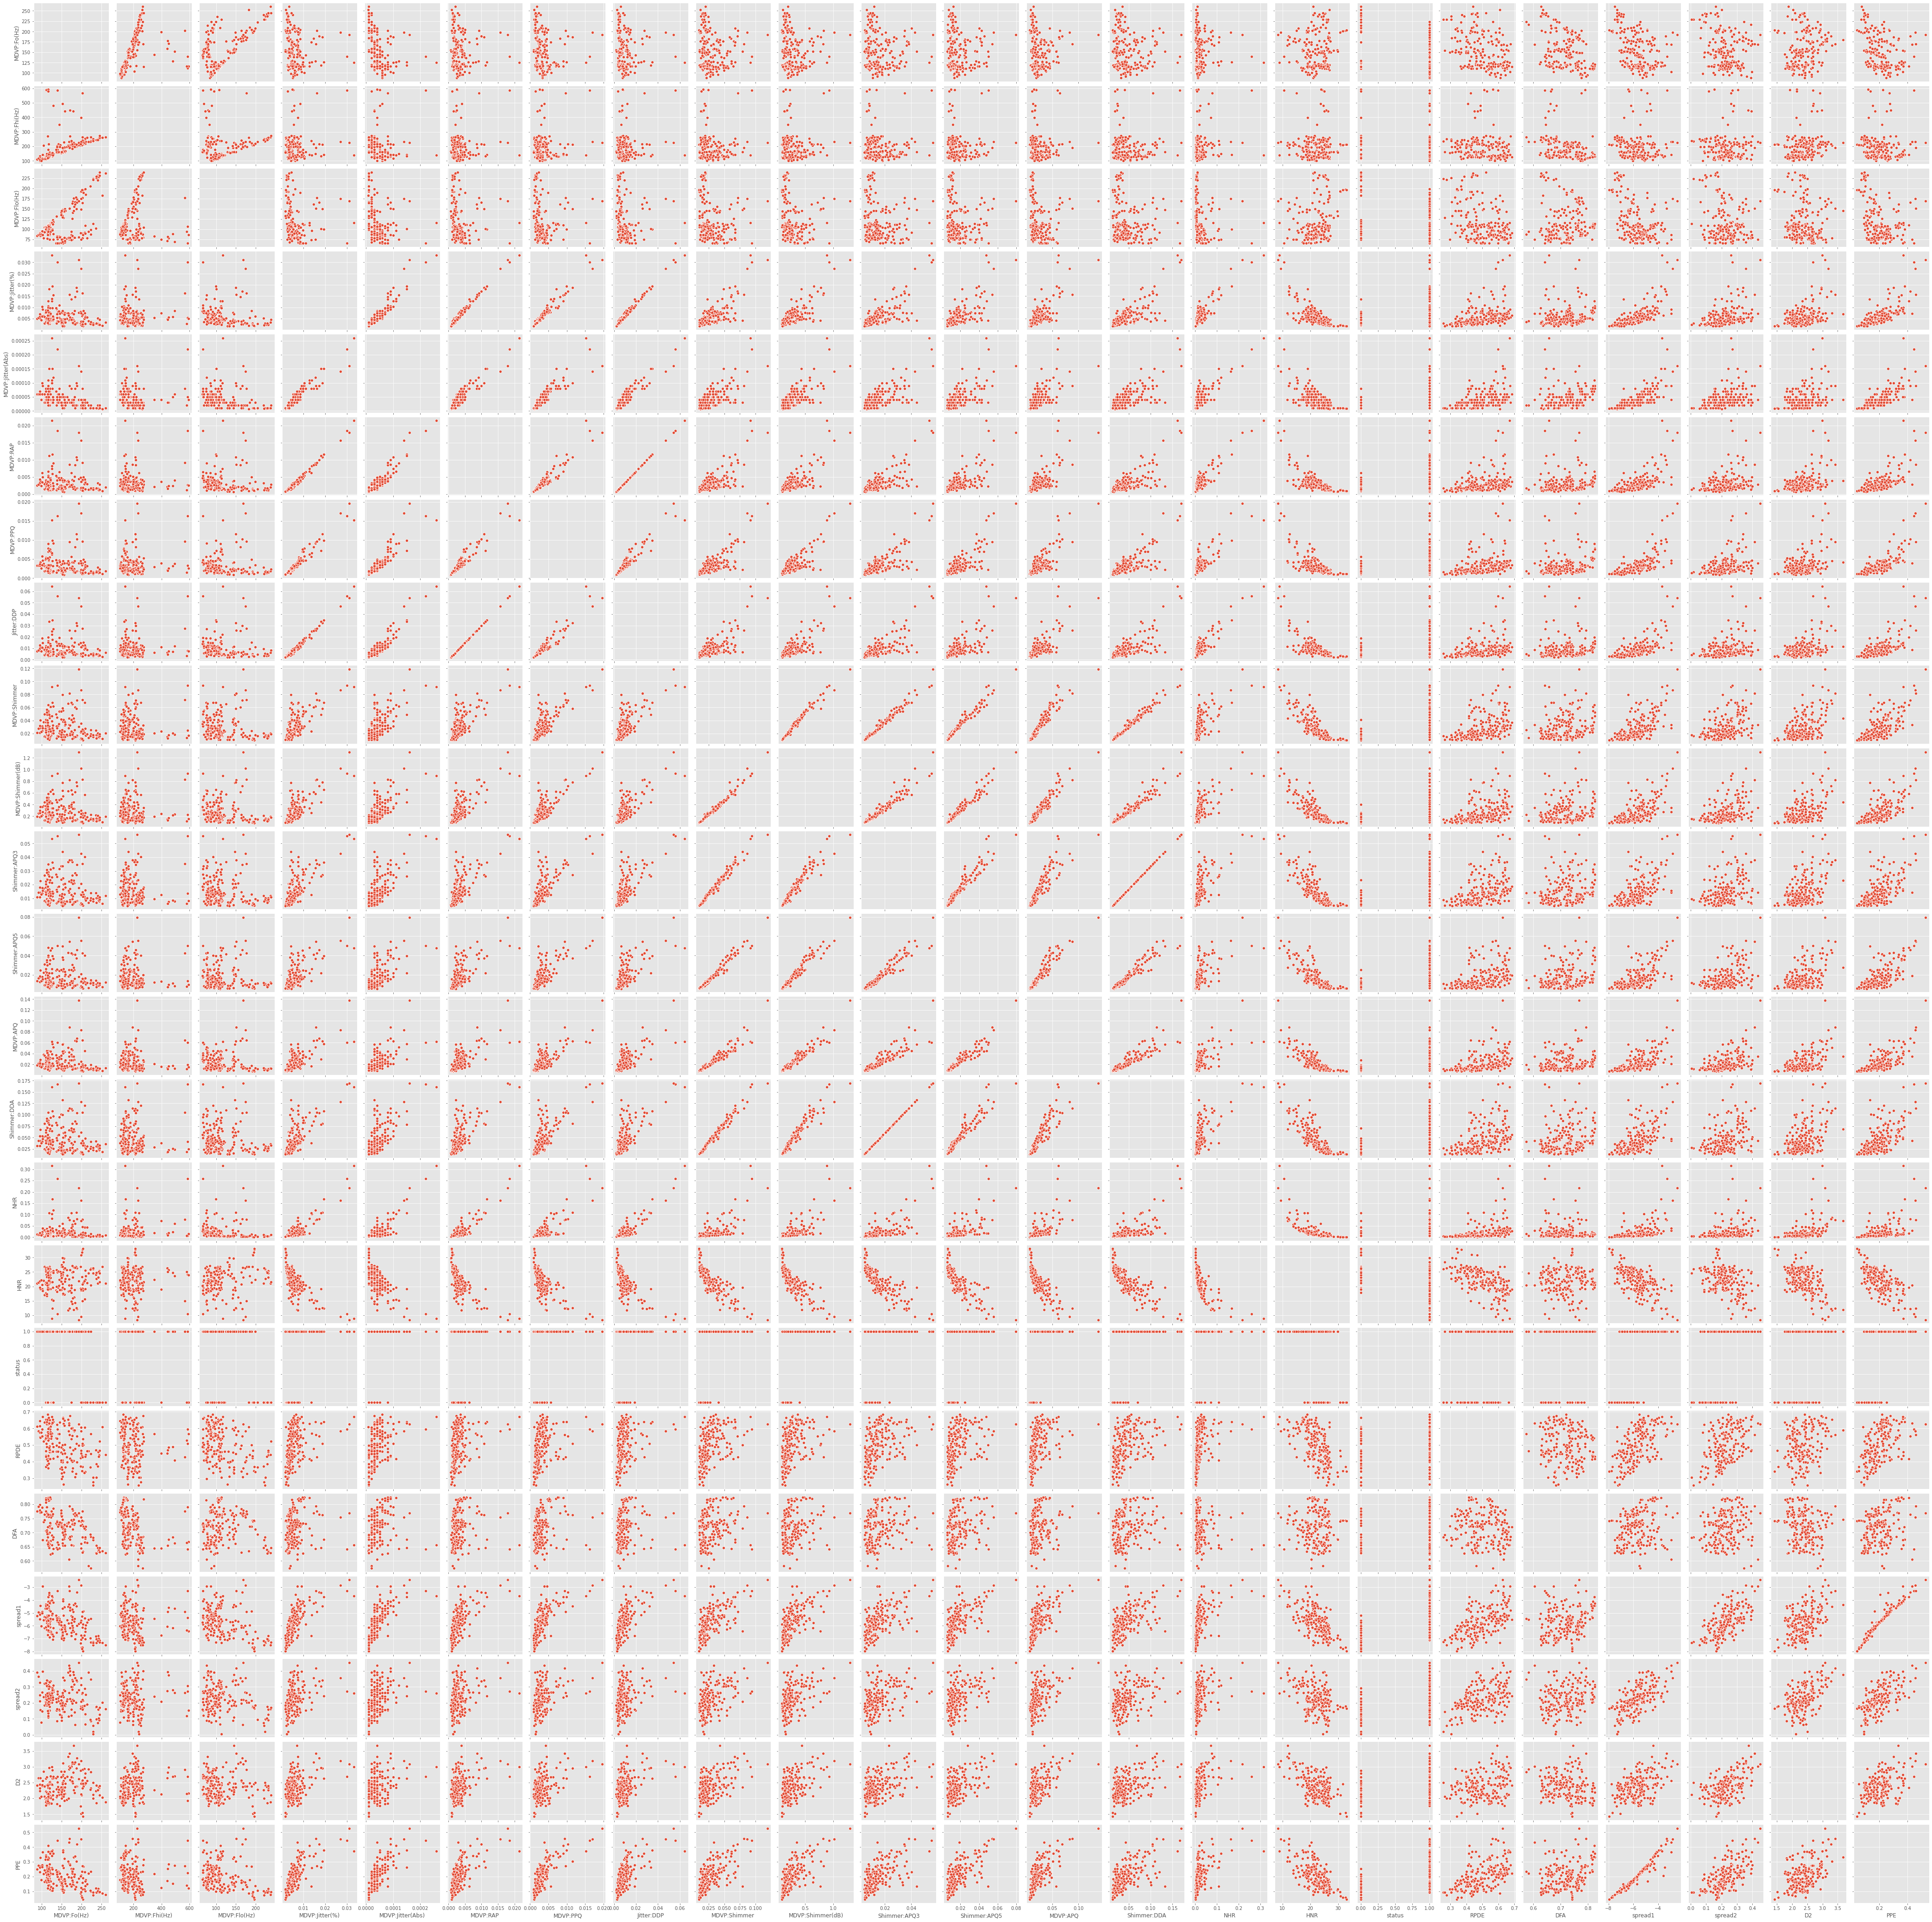

In [41]:
sns.pairplot(PKS_df_nw1,diag_kind='1')

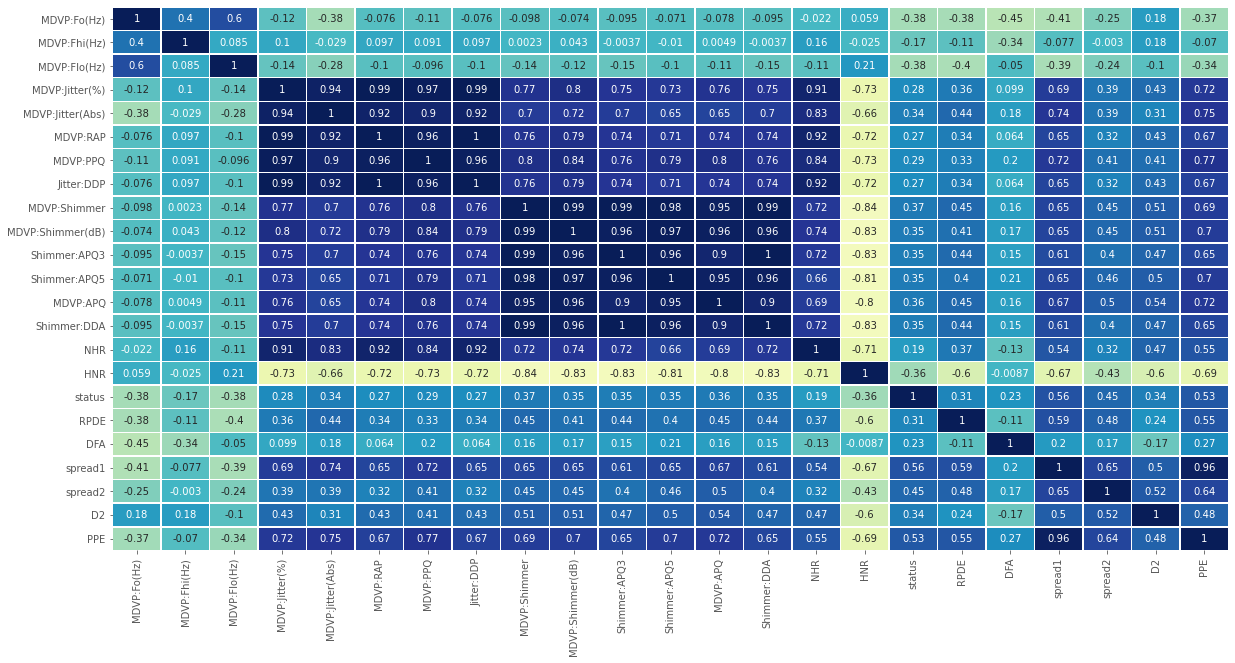

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(PKS_df_nw1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
# Jitter-DDP & MDVP-RAP are perfectly co-related
# Shimmer-DDA & Shimmer-APQ3 are perfectly co-related
# There are some others that have high co-relation (spread1/PPE, MDVP-Jitter(%)/Jitter-DDP) and few others

### Build a pruned decision tree model and present the evaluation metrics.

In [47]:
PKS_df_nw1.info()  # All values are of type 'float64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
#Split Data

In [50]:
X = PKS_df_nw1.drop("status" , axis=1)
y = PKS_df_nw1.pop("status")

In [51]:
# splitting data into training and test set for independent attributes
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=2)
X_train.shape,X_test.shape

((136, 22), (59, 22))

In [52]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(PKS_df_nw1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(PKS_df_nw1.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [ ]:
#1. First create models using Logistic Regression and Decision Tree algorithm.

In [53]:
#from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
#from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear", random_state=2)
logreg.fit(X_train, y_train)


coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

         0        1        2       3       4       5       6       7       8  \
0 -0.00982 -0.00234 -0.00004 0.01158 0.00010 0.00887 0.00767 0.02660 0.14454   

        9  ...      13      14      15      16      17      18      19  \
0 1.38752  ... 0.23733 0.05988 0.15150 0.38631 0.94948 1.27749 0.65013   

       20      21  intercept  
0 2.19713 0.56926    0.79210  

[1 rows x 23 columns]


In [54]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [56]:
y_predict = logreg.predict(X_test)

Trainig accuracy 0.8823529411764706

Testing accuracy 0.8135593220338984

Confusion Matrix


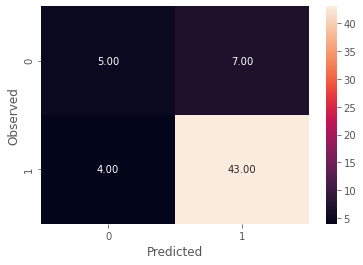

None

Recall: 0.9148936170212766

Precision: 0.86

F1 Score: 0.8865979381443299

Roc Auc Score: 0.6657801418439716


In [57]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [59]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

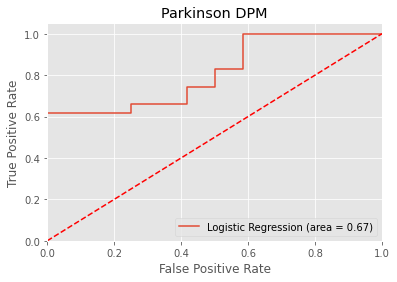

In [61]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Parkinson DPM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Build Decision Tree Model

In [ ]:
#GINI

In [62]:
# We will build our model using the DecisionTreeClassifier function with the 'gini' method of split 


PKS_tree_gini = DecisionTreeClassifier(criterion = 'gini', random_state=2)
PKS_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [63]:
print("Train: %.2f" % PKS_tree_gini.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % PKS_tree_gini.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.76


In [ ]:
#There sames to be low degree of overfitting in the model so, the test accuracy is about 76%.
#But we will Prune to try and improve it.


In [71]:
PKS_pruned = DecisionTreeClassifier(criterion = "gini", max_depth=3)
PKS_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
print("Train: %.2f" % PKS_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % PKS_pruned.score(X_test, y_test))  # performance on test data

Train: 0.94
Test: 0.80


In [ ]:
# We tried different max_depth of 2,3,4,5 to prune
# With a max_depth of 3 we got the better test score of 80%

In [73]:
preds_train = PKS_pruned.predict(X_train)
preds_test = PKS_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [74]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted  0   1
Actual          
0          5   7
1          5  42

0.7966101694915254


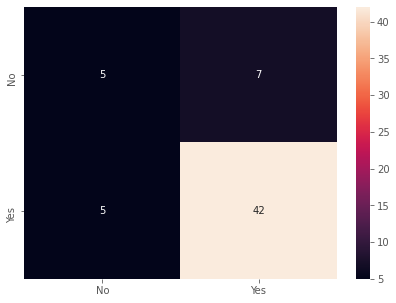

In [75]:
print(PKS_pruned.score(X_test , y_test))
y_predict = PKS_pruned.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree   0.79661

In [ ]:
#Logistic Regression has on Test : 0.81
#Decision Tree has on Test       : 0.80 

### Build all the ensemble models taught as a part of the curriculum and compare the models. Present the model comparison in a data frame.

In [ ]:
#Apply the Random forest model and print the accuracy of Random forest Model

In [79]:
#from sklearn.ensemble import RandomForestClassifier
PKS_rfcl = RandomForestClassifier(n_estimators = 50)
PKS_rfcl = PKS_rfcl.fit(X_train, y_train)

In [80]:
pred_RF = PKS_rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

0.8135593220338984


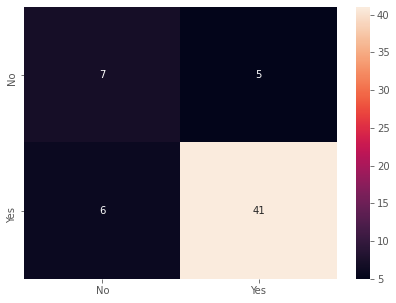

In [81]:
y_predict = PKS_rfcl.predict(X_test)
print(PKS_rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [82]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree   0.79661
0  Random Forest   0.81356

In [ ]:
#Apply Bagging Classifier Algorithm and print the accuracy.

In [84]:
#from sklearn.ensemble import BaggingClassifier

PKS_bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=2)
PKS_bgcl = PKS_bgcl.fit(X_train, y_train)

In [85]:
pred_BG = PKS_bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

0.7627118644067796


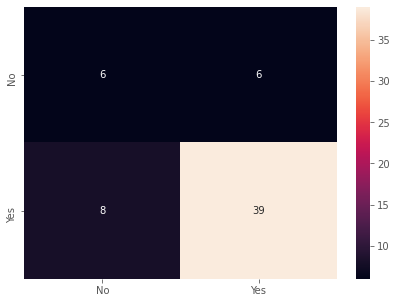

In [86]:
y_predict = PKS_bgcl.predict(X_test)

print(PKS_bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [87]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree   0.79661
0  Random Forest   0.81356
0        Bagging   0.76271

In [ ]:
#Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [89]:
#from sklearn.ensemble import AdaBoostClassifier
PKS_abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=2)
PKS_abcl = PKS_abcl.fit(X_train, y_train)

In [90]:
pred_AB =PKS_abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

0.7966101694915254


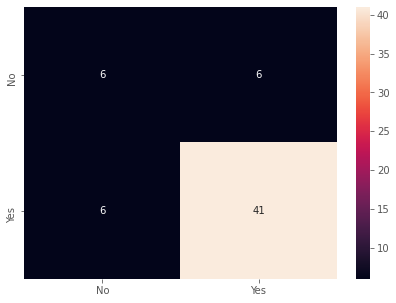

In [91]:
y_predict = PKS_abcl.predict(X_test)
print(PKS_abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree   0.79661
0  Random Forest   0.81356
0        Bagging   0.76271
0       Adaboost   0.79661

In [ ]:
#Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [94]:
#from sklearn.ensemble import GradientBoostingClassifier
PKS_gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=2)
PKS_gbcl = PKS_gbcl.fit(X_train, y_train)

In [95]:
pred_GB = PKS_gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

0.7966101694915254


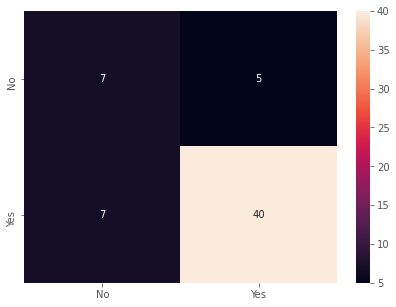

In [96]:
y_predict = PKS_gbcl.predict(X_test)
print(PKS_gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [97]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree   0.79661
0   Random Forest   0.81356
0         Bagging   0.76271
0        Adaboost   0.79661
0  Gradient Boost   0.79661

### Present the model comparison in a data frame.

In [99]:
# Let us look at the different model accuracy in a DF 
resultsDf

Method  accuracy
0   Decision Tree   0.79661
0   Random Forest   0.81356
0         Bagging   0.76271
0        Adaboost   0.79661
0  Gradient Boost   0.79661

### Comment on the codes and provide detailed explanation of the steps followed.

In [ ]:
# We tried different max_depth of 2,3,4,5 to prune
# With a max_depth of 3 we got the better test score of 80%

In [ ]:
# For this dataset, Random Forest model gives the best result on test predictions with (81.3%).
# Decision Tree, Adaboost & Gradient Boost rank second with (79.6%)
# Bagging is the lowest with (76.2%)

# THE END